In [1]:
from dotenv import load_dotenv
import os

# .env 파일 로딩
load_dotenv()

# API 키 불러오기
API_KEY = os.getenv("API_KEY")

if not API_KEY:
    print("❌ API_KEY가 없습니다. .env 파일을 확인하세요.")
else:
    print("✅ API 키 불러오기 성공")


❌ API_KEY가 없습니다. .env 파일을 확인하세요.


In [2]:
import requests

def summarize_article(content, apikey):
    url = "https://tools.kinds.or.kr/api/v1/summary"  # ← 요거 수정해!
    headers = {"Content-Type": "application/json"}
    payload = {
        "content": content,
        "apikey": apikey
    }

    response = requests.post(url, headers=headers, json=payload)

    if response.status_code == 200:
        return response.json()
    else:
        print("❌ 오류 발생:", response.status_code)
        print(response.text)
        return None


In [3]:
import requests
import os
from dotenv import load_dotenv

# .env에서 API 키 불러오기
load_dotenv()
API_KEY = os.getenv("API_KEY")

def summarize_article(content, apikey):
    url = "https://tools.kinds.or.kr/api/v1/summary"
    headers = {"Content-Type": "application/json"}
    payload = {
        "content": content,
        "apikey": apikey
    }

    response = requests.post(url, headers=headers, json=payload)

    if response.status_code == 200:
        return response.json()
    else:
        print("❌ 오류 발생:", response.status_code)
        print(response.text)
        return None

# 테스트용 기사 본문
article_text = """
인공지능 일반 지능(AGI)은 인간의 인지 능력과 맞먹거나 이를 능가하는 형태의 AI로, 특정 작업에 국한된 좁은 AI와는 구별된다...
"""

result = summarize_article(article_text, API_KEY)

if result:
    print("✅ 요약 결과:\n")
    print(result["summary"])
    print("\n🧮 사용된 토큰 수:", result["token_count"])
else:
    print("😵 요약 실패. 다시 확인하자.")


✅ 요약 결과:



KeyError: 'summary'

In [6]:
result = summarize_article(article_text, API_KEY)

if result:
    print("✅ API 응답 원본:\n")
    print(result)  # 먼저 전체 응답 확인

    if "summary" in result:
        print("\n🧠 요약 결과:\n")
        print(result["summary"])
        print("\n🧮 사용된 토큰 수:", result.get("token_count", "알 수 없음"))
    else:
        print("😵 'summary' 키가 없습니다. 응답 내용을 확인해보세요.")
else:
    print("😵 요약 실패. 다시 확인하자.")


✅ API 응답 원본:

{'request_id': '', 'result': -1, 'reason': 'Blank Access Key!:'}
😵 'summary' 키가 없습니다. 응답 내용을 확인해보세요.


In [4]:
print("🔑 API_KEY 값:", repr(API_KEY))


🔑 API_KEY 값: None


In [15]:
from dotenv import load_dotenv
import os

load_dotenv()
API_KEY = os.getenv("API_KEY")

print("🔑 API_KEY 값:", repr(API_KEY))  # <-- 이걸로 실체 확인

if not API_KEY:
    print("❌ API 키가 없습니다. .env 파일 확인하세요.")
else:
    print("✅ API 키 불러오기 성공")


🔑 API_KEY 값: None
❌ API 키가 없습니다. .env 파일 확인하세요.


In [11]:
print("🔎 API_KEY 정밀검사:", repr(API_KEY))


🔎 API_KEY 정밀검사: '254bec69-1c13-470f-904a-c4bc9e46cc80'


In [7]:
# 가짜 기사 원문 (네가 요약하고 싶은 텍스트)
content = """
인공지능 일반 지능(AGI)은 인간의 인지 능력과 맞먹거나 이를 능가하는 형태의 AI로, 특정 작업에 국한된 좁은 AI와는 구별된다.
"""

# API 키 (이미 불러온 값 사용)
apikey = API_KEY

# 실제로 전송될 payload 구조 확인
payload = {
    "content": content,
    "apikey": apikey
}

# 이걸로 출력해서 실제 값 확인
print("📦 payload 실제 내용:")
print(payload)


📦 payload 실제 내용:
{'content': '\n인공지능 일반 지능(AGI)은 인간의 인지 능력과 맞먹거나 이를 능가하는 형태의 AI로, 특정 작업에 국한된 좁은 AI와는 구별된다.\n', 'apikey': None}


In [17]:
import json

result = summarize_article(article_text, API_KEY)

if result:
    print("📦 실제 API 응답:\n")
    print(json.dumps(result, indent=2, ensure_ascii=False))  # 이걸로 진실을 보자

    if "summary" in result:
        print("\n✅ 요약 결과:\n")
        print(result["summary"])
    else:
        print("\n⚠️ 요약 실패: summary 키 없음. 이유 확인 필요")
else:
    print("❌ API 요청 자체 실패")


📦 실제 API 응답:

{
  "request_id": "",
  "result": -1,
  "reason": "Blank Access Key!:"
}

⚠️ 요약 실패: summary 키 없음. 이유 확인 필요


In [18]:
print("📛 API_KEY 확인:", repr(API_KEY))

payload = {
    "content": "이건 요약 테스트 텍스트야.",
    "apikey": API_KEY
}

print("📦 payload 확인:", payload)
print("🧪 apikey 값만:", repr(payload["apikey"]))


📛 API_KEY 확인: '254bec69-1c13-470f-904a-c4bc9e46cc80'
📦 payload 확인: {'content': '이건 요약 테스트 텍스트야.', 'apikey': '254bec69-1c13-470f-904a-c4bc9e46cc80'}
🧪 apikey 값만: '254bec69-1c13-470f-904a-c4bc9e46cc80'


In [14]:
from dotenv import load_dotenv
import os

load_dotenv()
raw_key = os.getenv("API_KEY")
API_KEY = raw_key.strip() if raw_key else None

print("🧽 정리된 API_KEY:", repr(API_KEY))


🧽 정리된 API_KEY: None


In [15]:
import requests
import os
from dotenv import load_dotenv

# 환경 변수 로딩
load_dotenv()
API_KEY = os.getenv("BIGKINDS_KEY")

# 요청 URL
url = "https://tools.kinds.or.kr/search/news"

# 간단한 요청 바디 (키워드만 넣음)
payload = {
    "access_key": API_KEY,
    "argument": {
        "query": "인공지능",
        "published_at": {
            "from": "2024-01-01",
            "until": "2024-01-02"
        },
        "provider": [],
        "category": [],
        "category_incident": [],
        "provider_subject": [],
        "subject_info": [],
        "sort": {
            "date": "desc"
        },
        "return_from": 0,
        "return_size": 1,
        "fields": ["title", "content"]
    }
}

# 요청 전송
response = requests.post(url, json=payload)

# 결과 확인
if response.status_code == 200:
    print("✅ API 통신 성공")
    result = response.json()
    print("📄 뉴스 제목 예시:", result["return_object"]["documents"][0]["title"])
else:
    print("❌ 오류 발생:", response.status_code)
    print(response.text)


✅ API 통신 성공
📄 뉴스 제목 예시: [만파식적] 6G와 ‘4류 정치’


In [16]:
# 결과 확인
if response.status_code == 200:
    print("✅ API 통신 성공")
    result = response.json()
    
    documents = result["return_object"]["documents"]
    print(f"📄 총 {len(documents)}개의 뉴스 제목 출력:\n")
    
    for i, doc in enumerate(documents, 1):
        print(f"{i}. {doc['title']}")
else:
    print("❌ 오류 발생:", response.status_code)
    print(response.text)


✅ API 통신 성공
📄 총 1개의 뉴스 제목 출력:

1. [만파식적] 6G와 ‘4류 정치’


In [23]:
result

{'result': 0,
 'return_object': {'total_hits': 24,
  'documents': [{'news_id': '02100311.20240101175815001',
    'title': '[만파식적] 6G와 ‘4류 정치’',
    'content': '주요국들이 ‘꿈의 통신’이라고 불리는 6세대(6G) 이동통신 기술 선점을 위해 총성 없는 전쟁을 벌이고 있다. 6G는 초당 100기가비트(Gb) 이상 최고 1테라비트(1Tb는 1000Gb) 전송속도로 최고 20Gb인 5G보다 50배 이상 전송 속도가 빠른 차세대 통신 기술이다. 자율주행차, 만물인터넷(IoE), 인공지능(AI), 확장현실(XR) 등을 구현하는 핵심 통신 기술 인프라다. 미국·유럽·일본·중국 등 주요국에서는 정보기술(IT) 기업들이 6G 구현을 위한 연구개발(R&amp;D)에 막대한 돈을 투자하고 있으며 정부도 지원을 아끼지 않고 있다. \n \n\n 2019년 세계 최초 5G 서비스 상용화라는 금자탑을 세운 우리 기업들도 발 빠르게 움직이고 있다. 5G 최초 상용화라는 타이틀을 얻었음에도 정작 5G 장비 시장에서 중국에 밀린 뼈아픈 경험을 되풀이하지 않기 위해서다. 삼성전자는 2019년부터 삼성리서치 차세대 통신연구센터에서 6G 선행 기술 연구를 시작했으며 2022년 5월에는 세계 최초로 ‘6G 주파스 백서’를 발간했다. LG 전자는 지난해 6G 테라헤르츠(㎔) 대역 무선 데이터 전송 테스트에서 도심 지역으로는 세계 최장 거리 수준인 실외 500m 데이터 송수신에 성공했다. SK텔레콤·KT·LG유플러스 등 통신3사도 6G 연구에 매진하고 있다. 2028년 6G 상용화를 목표로 제시한 우리 정부는 향후 5년 동안 4407억 원을 R&amp;D에 투자할 계획이다. \n \n\n 우리 기업들이 ‘혁신’에 전력투구를 하는 동안 우리 정치권은 퇴행적 권력 다툼에 여념이 없다. 거대 야당인 더불어민주당은 ‘이재명 사당, 개딸당’으로 변질됐고 여당인 국민의힘은 ‘용산의 여의도

# query 범위 확장

In [31]:
import requests
import os
from dotenv import load_dotenv

# 환경 변수 로딩
load_dotenv()
API_KEY = os.getenv("BIGKINDS_KEY")

# 요청 URL
url = "https://tools.kinds.or.kr/search/news"

# 간단한 요청 바디 (키워드만 넣음)
payload = {
    "access_key": API_KEY,
    "argument": {
        "query": "인공지능",
        "published_at": {
            "from": "2025-01-01",
            "until": "2025-02-02"
        },
        "provider": [],
        "category": [],
        "category_incident": [],
        "provider_subject": [],
        "subject_info": [],
        "sort": {
            "date": "desc"
        },
        "return_from": 0,
        "return_size": 10,
        "fields": ["title", "content"]
    }
}

# 요청 전송
response = requests.post(url, json=payload)

# 결과 확인
if response.status_code == 200:
    print("✅ API 통신 성공")
    result = response.json()
    documents = result["return_object"]["documents"]
    
    print(f"📄 총 {len(documents)}개 기사 중 최대 5개 출력:\n")
    for i, doc in enumerate(documents[:5], 1):
        print(f"{i}. 제목: {doc['title']}")
else:
    print("❌ 오류 발생:", response.status_code)
    print(response.text)


✅ API 통신 성공
📄 총 10개 기사 중 최대 5개 출력:

1. 제목: 딥시크 "천안문 사태는 中흑역사"…대만 천재해커 '검열' 뚫었다
2. 제목: 이재명 "AI 예산 담은 추경 적극 협조…정부 제안 기다리겠다"
3. 제목: 국힘 "이재명, AI 진심이라면 반도체 특별법부터 협조하라"
4. 제목: '中 딥시크' 보란듯…오픈AI, 추론 모델 'o3 미니' 무료 배포
5. 제목: 삼성전자, HBM3E '개선제품' 내놓는다…"경영 어려움 단시간 해결" [biz-플러스]


# 요청 쿼리 확장

In [32]:
import requests
import os
from dotenv import load_dotenv

# 환경 변수 로딩
load_dotenv()
API_KEY = os.getenv("BIGKINDS_KEY")
url = "https://tools.kinds.or.kr/search/news"

# 분석할 언론사 리스트
providers = ["조선일보", "중앙일보", "한겨레", "서울경제", "매일경제", "동아일보"]

# 결과 저장용
ai_article_counts = {}

# 반복해서 각 언론사별 기사 수 확인
for provider in providers:
    payload = {
        "access_key": API_KEY,
        "argument": {
            "query": "인공지능 OR AI",
            "published_at": {
                "from": "2025-01-01",
                "until": "2025-01-31"
            },
            
            "provider": [provider],
            "category": [],
            "category_incident": [],
            "provider_subject": [],
            "subject_info": [],
            "return_from": 0,
            "return_size": 1,
            "fields": ["title"]
        }
    }

    response = requests.post(url, json=payload)
    if response.status_code == 200:
        result = response.json()
        count = result["return_object"].get("total_hits", 0)
        ai_article_counts[provider] = count
    else:
        ai_article_counts[provider] = "❌ 에러"

# 결과 출력
print("\n📊 AI 관련 기사 수 (2024년 기준)\n")
for provider, count in ai_article_counts.items():
    print(f"{provider}: {count}건")



📊 AI 관련 기사 수 (2024년 기준)

조선일보: 0건
중앙일보: 0건
한겨레: 0건
서울경제: 1341건
매일경제: 0건
동아일보: 0건


In [34]:
from datetime import datetime, timedelta
import requests
import os
from dotenv import load_dotenv
import pandas as pd

# 환경 변수 로딩
load_dotenv()
API_KEY = os.getenv("BIGKINDS_KEY")

# 키워드
query = "인공지능 OR AI OR 챗GPT OR 딥러닝"

# 날짜 설정 (일주일 단위로 쪼갬)
start_date = datetime.strptime("2024-01-01", "%Y-%m-%d")
end_date = datetime.strptime("2024-12-31", "%Y-%m-%d")
chunk_size = 7  # 7일씩 묶기

# 결과 저장
data = []

current = start_date
while current <= end_date:
    from_str = current.strftime("%Y-%m-%d")
    until_date = current + timedelta(days=chunk_size - 1)
    if until_date > end_date:
        until_date = end_date
    until_str = until_date.strftime("%Y-%m-%d")

    payload = {
        "access_key": API_KEY,
        "argument": {
            "query": query,
            "published_at": {
                "from": from_str,
                "until": until_str
            },
            "provider": ["서울경제"],
            "category": [],
            "category_incident": [],
            "provider_subject": [],
            "subject_info": [],
            "return_from": 0,
            "return_size": 1,
            "fields": ["title"]
        }
    }

    response = requests.post("https://tools.kinds.or.kr/search/news", json=payload)
    if response.status_code == 200:
        result = response.json()
        hits = result["return_object"].get("total_hits", 0)
        print(f"{from_str} ~ {until_str}: {hits}건")
        data.append({
            "기간": f"{from_str} ~ {until_str}",
            "기사 수": hits
        })
    else:
        print(f"{from_str} ~ {until_str}: 요청 실패")
        data.append({
            "기간": f"{from_str} ~ {until_str}",
            "기사 수": "에러"
        })

    current += timedelta(days=chunk_size)

# DataFrame 변환 및 확인
df = pd.DataFrame(data)
print("\n📊 주간별 AI 기사 수 요약:")
print(df.head())

# CSV 저장 (선택)
df.to_csv("서울경제_AI_기사_주간_통계.csv", index=False)


2024-01-01 ~ 2024-01-07: 197건
2024-01-08 ~ 2024-01-14: 316건
2024-01-15 ~ 2024-01-21: 231건
2024-01-22 ~ 2024-01-28: 217건
2024-01-29 ~ 2024-02-04: 240건
2024-02-05 ~ 2024-02-11: 207건
2024-02-12 ~ 2024-02-18: 234건
2024-02-19 ~ 2024-02-25: 264건
2024-02-26 ~ 2024-03-03: 267건
2024-03-04 ~ 2024-03-10: 305건
2024-03-11 ~ 2024-03-17: 260건
2024-03-18 ~ 2024-03-24: 250건
2024-03-25 ~ 2024-03-31: 250건
2024-04-01 ~ 2024-04-07: 267건
2024-04-08 ~ 2024-04-14: 243건
2024-04-15 ~ 2024-04-21: 254건
2024-04-22 ~ 2024-04-28: 255건
2024-04-29 ~ 2024-05-05: 234건
2024-05-06 ~ 2024-05-12: 283건
2024-05-13 ~ 2024-05-19: 193건
2024-05-20 ~ 2024-05-26: 260건
2024-05-27 ~ 2024-06-02: 374건
2024-06-03 ~ 2024-06-09: 228건
2024-06-10 ~ 2024-06-16: 258건
2024-06-17 ~ 2024-06-23: 264건
2024-06-24 ~ 2024-06-30: 281건
2024-07-01 ~ 2024-07-07: 281건
2024-07-08 ~ 2024-07-14: 270건
2024-07-15 ~ 2024-07-21: 244건
2024-07-22 ~ 2024-07-28: 242건
2024-07-29 ~ 2024-08-04: 234건
2024-08-05 ~ 2024-08-11: 250건
2024-08-12 ~ 2024-08-18: 228건
2024-08-19

In [1]:
import requests
import os
from dotenv import load_dotenv

# 1. 환경 변수에서 API 키 불러오기
load_dotenv()
API_KEY = os.getenv("BIGKINDS_KEY")

# 2. 검색 대상 키워드 & 기간 설정
query = "김포"
from_date = "2025-04-01"
until_date = "2025-04-15"

# 3. API 요청 URL
url = "https://tools.kinds.or.kr/search/news"

# 4. 요청 바디 구성
payload = {
    "access_key": API_KEY,
    "argument": {
        "query": query,
        "published_at": {
            "from": from_date,
            "until": until_date
        },
        "provider": ["서울경제"],  # 
        "category": [],
        "category_incident": [],
        "provider_subject": [],
        "subject_info": [],
        "sort": { "date": "desc" },
        "return_from": 0,
        "return_size": 10000,
        "fields": ["title", "published_at"]
    }
}

# 5. 요청 보내고 결과 확인
response = requests.post(url, json=payload)

if response.status_code == 200:
    print("✅ API 호출 성공!")
    result = response.json()
    documents = result["return_object"]["documents"]

    for i, doc in enumerate(documents, 1):
        print(f"\n{i}. 📰 {doc['title']}")
        print(f"   📅 {doc['published_at']}")
else:
    print("❌ 오류 발생:", response.status_code)
    print(response.text)


✅ API 호출 성공!

1. 📰 2.4조 김포 이음시티 무분별한 의혹 제기에 '황당'…시민 편익 높인다
   📅 2025-04-14T00:00:00.000+09:00

2. 📰 "다산신도시에 무슨 일 있어?" 10대 로펌까지 나선 분양가 소송
   📅 2025-04-14T00:00:00.000+09:00

3. 📰 일산대교 하이패스 차로 늘린다
   📅 2025-04-13T00:00:00.000+09:00

4. 📰 분양가 뻥튀기 집단訴…10대 로펌까지 가세
   📅 2025-04-13T00:00:00.000+09:00

5. 📰 벚꽃 만개한 계양천서 만나요…'김포벚꽃축제' 11일 개막 공연[김포톡톡]
   📅 2025-04-11T00:00:00.000+09:00

6. 📰 김포시, 솔터체육공원 파크골프장 조성 사업 착공
   📅 2025-04-11T00:00:00.000+09:00

7. 📰 "흥분하면 목 물어 뜯어" 양초에 숨겨진 '위험 물질'의 정체
   📅 2025-04-11T00:00:00.000+09:00

8. 📰 '전투기 무단촬영' 中고교생들, 첫 입국 아니었다…지난해에도 다녀가
   📅 2025-04-10T00:00:00.000+09:00

9. 📰 ‘전투기 촬영’ 10대 중국인들, 공항도 수천 장 찍었다… 2~3차례 입국
   📅 2025-04-09T00:00:00.000+09:00

10. 📰 시민이 제안한 의견 현실로…김포시, 월곶면 주민대피시설 신축 본격화
   📅 2025-04-09T00:00:00.000+09:00

11. 📰 사람 무는 ‘좀비마약’ 메페드론 밀수입한 카자흐스탄 조직 적발
   📅 2025-04-09T00:00:00.000+09:00

12. 📰 美 상호관세 정식 발효…원·달러환율 1500원 목전
   📅 2025-04-09T00:00:00.000+09:00

13. 📰 이재용, 日 출장 마치고 귀국…글로벌 행보 이어간다
   📅 2025-04-09T00:00:00.000+09:00

14. 📰 이재용 삼성전자 회장

# 빅카인 api 전체 항목 코드 구현

# 2. 뉴스 검색 api

In [3]:
import requests
import os
from dotenv import load_dotenv
from pprint import pprint

# 1. 환경 변수 로딩
load_dotenv()
API_KEY = os.getenv("BIGKINDS_KEY")

# 2. 요청 URL
url = "https://tools.kinds.or.kr/search/news"

# 3. 다양한 테스트 케이스 입력
search_conditions = {
    "query": "엔비디아",   # 🔍 키워드 실험 가능
    "from": "2025-06-01",                  # 🗓️ 기간 조절 가능
    "until": "2025-06-02",
    "provider": [""],              # 📰 너희 회사로 제한 (기타 안됨)
    "category": [],                        # 예: ["IT_과학"], ["경제"]
    "fields": ["title", "published_at", "content", "provider", "byline"]  # 어떤 데이터 받고 싶은지
}

# 4. 요청 payload 구성
payload = {
    "access_key": API_KEY,
    "argument": {
        "query": search_conditions["query"],
        "published_at": {
            "from": search_conditions["from"],
            "until": search_conditions["until"]
        },
        "provider": search_conditions["provider"],
        "category": search_conditions["category"],
        "category_incident": [],
        "provider_subject": [],
        "subject_info": [],
        "sort": {"date": "desc"},
        "return_from": 0,
        "return_size": 100,
        "fields": search_conditions["fields"]
    }
}

# 5. 요청 보내기
response = requests.post(url, json=payload)

# 6. 결과 출력
if response.status_code == 200:
    print("✅ 뉴스 검색 API 호출 성공!")
    result = response.json()
    documents = result["return_object"]["documents"]
    total_hits = result["return_object"]["total_hits"]

    print(f"\n📊 총 검색 결과: {total_hits}건\n")

    for i, doc in enumerate(documents, 1):
        print(f"----- {i} -----")
        for field in search_conditions["fields"]:
            print(f"{field}: {doc.get(field, '[없음]')}")
        print()
else:
    print("❌ 오류 발생:", response.status_code)
    print(response.text)


✅ 뉴스 검색 API 호출 성공!

📊 총 검색 결과: 6건

----- 1 -----
title: “美장 오를만큼 올랐나”…서학개미 7개월 만에 순매도 전환[인베스팅 인사이트]
published_at: 2025-06-01T00:00:00.000+09:00
content: 국내 개인 투자자들이 지난달 미국 주식을 2조 원 가까이 팔아치우며 7개월 만에 매도 우위로 돌아섰다. 도널드 트럼프 미국 대통령 관세 정책의 결과에 대한 증시의 변동성이 커진 가운데, 기술주를 중심으로 주가가 크게 오르자 대규모 차익 실현에 나선 것으로 풀이된다. 
 

 1일 한국예탁결제원에 따르면 국내 개인 투자자들은 지난달 한 달 동안 미국 주식 13억 1085만 달러(약 1조 8140억 원)를 순매도했다. 이로써 지난해 11월 이후 6개월 연속 이어져오던 국내 투자자들의 순매수 행렬은 7개월 만에 매도 우위로 돌아서게 됐다. 서학 개미들은 앞선 6개월 간 171억 5720만 달러(23조 7421억 원)어치의 미국 주식을 사들인 바 있다. 이들은 올 4월까지만 해도 37억 537만 달러(약 5조 1275억 원)어치를 베팅했다. 
 

 
 
 특히 순매도 액수가 10억 달러 이상의 대규모 순매도를 보인 것은 2023년 12월 이후 처음이다. 당시 순매도 결제액은 19억 2220만 달러(약 2조 6599억 원)를 기록했다. 미국 주식 보관액은 지난달 29일 기준 1211억 3686만 달러(약 67조 6292억 원)를 기록했다. 
 

 서학 개미들이 순매도에 나선 것은 트럼프 대통령의 관세·감세 정책으로 뉴욕 증시의 변동성이 커지자, 차익을 실현하고 방어적인 투자 전략을 택한 결과로 풀이된다. 여기에 원·달러 환율이 급락하고 환차손에 대한 우려까지 겹치면서 매도세에 힘이 실렸다. 
 

 이들이 가장 많이 내다 판 종목은 테슬라였으며, 필라델피아 반도체 지수의 일일 수익률을 3배로 추종하는 ‘디렉시온 데일리 세미컨덕터 불 3배’ 상장지수펀드(ETF), 테슬라의 일일 수익률을 2배로 추종

# 3. 뉴스 조회 api

In [42]:
docs = result["return_object"]["documents"]

for i, doc in enumerate(docs[:5], 1):
    print(f"{i}. 뉴스 ID:", doc["news_id"])


1. 뉴스 ID: 02100311.20250414223657001
2. 뉴스 ID: 02100311.20250414203036001
3. 뉴스 ID: 02100311.20250414200858001
4. 뉴스 ID: 02100311.20250414192355001
5. 뉴스 ID: 02100311.20250414191029001


In [11]:
import requests
import os
from dotenv import load_dotenv

# 1. API 키 로딩
load_dotenv()
API_KEY = os.getenv("BIGKINDS_KEY")

# 2. 검색 파라미터 정의
query = ""
from_date = "2025-05-10"
until_date = "2025-05-10"
provider = ["서울경제"]
preview_length = 200  # 기사 본문 미리보기 길이

# 3. 뉴스 검색 API 요청
search_url = "https://tools.kinds.or.kr/search/news"

search_payload = {
    "access_key": API_KEY,
    "argument": {
        "query": query,
        "published_at": {
            "from": from_date,
            "until": until_date
        },
        "provider": provider,
        "category": [],
        "category_incident": [],
        "provider_subject": [],
        "subject_info": [],
        "sort": { "date": "desc" },
        "return_from": 0,
        "return_size": 5,
        "fields": ["news_id", "title", "published_at"]
    }
}

search_response = requests.post(search_url, json=search_payload)

if search_response.status_code == 200:
    search_result = search_response.json()
    docs = search_result["return_object"]["documents"]
    total_hits = search_result["return_object"]["total_hits"]

    if not docs:
        print("❗ 뉴스 검색 결과가 없습니다.")
    else:
        print("✅ 뉴스 검색 API 호출 성공!")
        print(f"📦 총 검색 결과: {total_hits}건\n")

        # 뉴스 ID 추출
        news_ids = [doc["news_id"] for doc in docs]
        for i, doc in enumerate(docs, 1):
            print(f"{i}. 뉴스 ID: {doc['news_id']} | 제목: {doc['title']}")
        
        print("\n📥 뉴스 ID로 상세 기사 조회 시작...\n")

        # 4. 뉴스 조회 API 요청
        view_payload = {
            "access_key": API_KEY,
            "argument": {
                "news_ids": news_ids,
                "fields": [
                    "title",
                    "content",
                    "byline",
                    "category",
                    "published_at",
                    "provider",
                    "images",
                    "images_caption"
                ]
            }
        }

        view_response = requests.post(search_url, json=view_payload)

        if view_response.status_code == 200:
            view_result = view_response.json()
            print("✅ 뉴스 조회 API 호출 성공!\n")

            for i, doc in enumerate(view_result["return_object"]["documents"], 1):
                print(f"----- {i}번째 뉴스 -----")
                print("제목:", doc.get("title", "없음"))
                print("기자:", doc.get("byline", "없음"))
                print("발행일:", doc.get("published_at", "없음"))
                print("카테고리:", doc.get("category", []))
                print("언론사:", doc.get("provider", "없음"))
                print("본문 (앞부분):", doc.get("content", "")[:preview_length], "...")

                # 이미지 있을 경우만 출력
                image_url = doc.get("images")
                if image_url:
                    print("🖼 이미지 URL:", image_url)
                    print("📝 이미지 설명:", doc.get("images_caption", "설명 없음"))
                print()

        else:
            print("❌ 뉴스 조회 API 오류:", view_response.status_code)
            try:
                print(view_response.json().get("reason", "알 수 없는 오류"))
            except:
                print(view_response.text)

else:
    print("❌ 뉴스 검색 API 오류:", search_response.status_code)
    try:
        print(search_response.json().get("reason", "알 수 없는 오류"))
    except:
        print(search_response.text)


❗ 뉴스 검색 결과가 없습니다.


# 4. 오늘의 이슈 api(이슈 랭킹 api)

In [3]:
import requests
import os
from dotenv import load_dotenv

# 1. 환경 변수에서 API 키 로딩
load_dotenv()
API_KEY = os.getenv("BIGKINDS_KEY")

# 2. 날짜 & 언론사 설정
url = "https://tools.kinds.or.kr/issue_ranking"
target_date = "2025-06-02"
provider = ["서울경제"]  # 생략 가능

# 3. 요청 바디 구성
payload = {
    "access_key": API_KEY,
    "argument": {
        "date": target_date,
        "provider": provider
    }
}

# 4. API 호출
response = requests.post(url, json=payload)

# 5. 결과 처리
if response.status_code == 200:
    result = response.json()
    topics = result["return_object"].get("topics", [])

    print(f"\n✅ 이슈 랭킹 API 호출 성공! ({target_date})\n")

    if not topics:
        print("📭 이 날은 이슈가 없어요. 조용한 날인가봐요.")
    else:
        # topic_rank 기준으로 오름차순 정렬 (중요도 높은 순)
        topics = sorted(topics, key=lambda x: x["topic_rank"])

        for i, topic in enumerate(topics, 1):
            print(f"🧠 {i}. 이슈 제목: {topic['topic']}")
            print(f"   🔗 주요 키워드: {topic['topic_keyword']}")
            print(f"   🔢 중요도 (topic_rank): {topic['topic_rank']}")
            print(f"   📰 관련 기사 수: {len(topic['news_cluster'])}")
            
            # 뉴스 ID 리스트 (선택 출력)
            print("   🆔 뉴스 ID:")
            for news_id in topic["news_cluster"]:
                print(f"     - {news_id}")
            print("-" * 80)

else:
    print("❌ 이슈 랭킹 API 오류 발생:", response.status_code)
    try:
        print("사유:", response.json().get("reason", "알 수 없는 오류"))
    except:
        print(response.text)



✅ 이슈 랭킹 API 호출 성공! (2025-06-02)

🧠 1. 이슈 제목: 교육부, '댓글 의혹' 리박스쿨 전수조사키로
   🔗 주요 키워드: 리박스쿨,스쿨,전수조사,조사,전수,학교,교육부,늘봄,늘봄학교,관련성,댓글,의혹,조작,착수,강사,댓글조작,막판,부대,논란,활동,대선,교서,10개,여론,서울교대,서울,작성,대상,활용,운영,상황,과학,극우,서울시내,골자,체험,회견,중앙선대위,한국늘봄교육연합회,창의체험활동지도사,공작원,행정,이날,보수,교육계,소지,단장,취재,교육기관,파악
   🔢 중요도 (topic_rank): 23
   📰 관련 기사 수: 1
   🆔 뉴스 ID:
     - 02100311.20250601212819001
--------------------------------------------------------------------------------
🧠 2. 이슈 제목: LG엔솔, 美서 ESS용 LFP 배터리 양산
   🔗 주요 키워드: 양산,엔솔,규모,대규모,배터리,돌입,현지,미국,강화,생산,에너지,솔루션,캐즘,고객,시작,역량,관세,유일,공급,대응,북미,체계,글로벌,본격화,공장,리밸런싱,개시,압도적,박차,생산역량,협의,업체,홀랜드,다수,전환,돌파,안정화,안정,조기,돌파구,선점,성과,전기차,현지생산,장벽,플랜트,효율,전기차용,재편,법인
   🔢 중요도 (topic_rank): 24
   📰 관련 기사 수: 1
   🆔 뉴스 ID:
     - 02100311.20250601100951001
--------------------------------------------------------------------------------
🧠 3. 이슈 제목: 이재명 “‘준보훈병원’ 도입…국가 헌신 합당 대우”
   🔗 주요 키워드: 보훈,이재명,헌신,국가,합당,예우,이념,대우,통합,공약,국민,정치,지원,애국심,보장,병원,유공자,보훈공약,국민통합,보훈병원,강화,국가유공자,급여금,보훈급여금,의료,명예,재정립,대선,체계,제도,개선,21대,현실,보

# 5. 연관어 분석 api(워드 클라우드)

In [47]:
import requests
import os
from dotenv import load_dotenv

# 1. API 키 로딩
load_dotenv()
API_KEY = os.getenv("BIGKINDS_KEY")

# 2. 요청 설정
url = "https://tools.kinds.or.kr/word_cloud"

# 분석 기준 키워드와 기간
query_keyword = "인공지능"
from_date = "2025-04-01"
until_date = "2025-04-14"
provider = ["서울경제"]
category = ["IT_과학"]

# 3. 요청 바디 구성
payload = {
    "access_key": API_KEY,
    "argument": {
        "query": query_keyword,
        "published_at": {
            "from": from_date,
            "until": until_date
        },
        "provider": provider,
        "category": category,
        "category_incident": [],
        "byline": "",
        "provider_subject": []
    }
}

# 4. API 호출
response = requests.post(url, json=payload)

# 5. 결과 처리
if response.status_code == 200:
    result = response.json()
    nodes = result["return_object"].get("nodes", [])

    print(f"✅ 연관어 분석 API 호출 성공! (기준 키워드: '{query_keyword}')\n")

    if not nodes:
        print("📭 연관 키워드가 없습니다.")
    else:
        print("📌 연관 키워드 목록 (중요도 순):\n")
        # 중요도 기준 내림차순 정렬
        nodes = sorted(nodes, key=lambda x: x["weight"], reverse=True)

        for i, node in enumerate(nodes, 1):
            print(f"{i}. 🔑 키워드: {node['name']:<15} 중요도(weight): {node['weight']:.3f}")
else:
    print("❌ 연관어 분석 API 오류 발생:", response.status_code)
    try:
        print("사유:", response.json().get("reason", "알 수 없는 오류"))
    except:
        print(response.text)


✅ 연관어 분석 API 호출 성공! (기준 키워드: '인공지능')

📌 연관 키워드 목록 (중요도 순):

1. 🔑 키워드: AI              중요도(weight): 139.130
2. 🔑 키워드: 삼성전자            중요도(weight): 6.670
3. 🔑 키워드: LG전자            중요도(weight): 5.190
4. 🔑 키워드: 오픈AI            중요도(weight): 5.040
5. 🔑 키워드: 데이터센터           중요도(weight): 4.870
6. 🔑 키워드: CEO             중요도(weight): 4.200
7. 🔑 키워드: 반도체             중요도(weight): 4.200
8. 🔑 키워드: 챗GPT            중요도(weight): 4.200
9. 🔑 키워드: GPU             중요도(weight): 4.000
10. 🔑 키워드: 중국              중요도(weight): 4.000
11. 🔑 키워드: 마이크로소프트         중요도(weight): 3.330
12. 🔑 키워드: MS              중요도(weight): 3.110
13. 🔑 키워드: SK              중요도(weight): 2.860
14. 🔑 키워드: SK텔레콤           중요도(weight): 2.670
15. 🔑 키워드: 그래픽처리장치         중요도(weight): 2.670
16. 🔑 키워드: 보고서             중요도(weight): 2.670
17. 🔑 키워드: AGI             중요도(weight): 2.670
18. 🔑 키워드: IoT             중요도(weight): 2.670
19. 🔑 키워드: 사물인터넷           중요도(weight): 2.670
20. 🔑 키워드: 롯데마트            중요도(weight): 2.310
21. 🔑 키워드: KT              

# 6. 키워드 트렌드 api(뉴스 타임라인)

In [52]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 1. 맥북 기본 한글 폰트 지정 (AppleGothic 또는 NanumGothic)
plt.rcParams['font.family'] = 'AppleGothic'

# 2. 마이너한 깨짐 방지 (음수 표시 에러 방지)
plt.rcParams['axes.unicode_minus'] = False



✅ 키워드 트렌드 API 호출 성공! (키워드: '인공지능')

📊 날짜별 키워드 언급량:

20250301 → 25건
20250302 → 22건
20250303 → 42건
20250304 → 53건
20250305 → 58건
20250306 → 53건
20250307 → 43건
20250308 → 13건
20250309 → 27건
20250310 → 41건
20250311 → 42건
20250312 → 57건
20250313 → 47건
20250314 → 37건
20250315 → 9건
20250316 → 17건
20250317 → 40건
20250318 → 37건
20250319 → 69건
20250320 → 54건
20250321 → 26건
20250322 → 11건
20250323 → 27건
20250324 → 40건
20250325 → 52건
20250326 → 61건
20250327 → 56건
20250328 → 36건
20250329 → 5건
20250330 → 23건
20250331 → 36건
20250401 → 45건
20250402 → 51건
20250403 → 42건
20250404 → 30건
20250405 → 3건
20250406 → 20건
20250407 → 33건
20250408 → 55건
20250409 → 45건
20250410 → 40건
20250411 → 24건
20250412 → 6건
20250413 → 32건


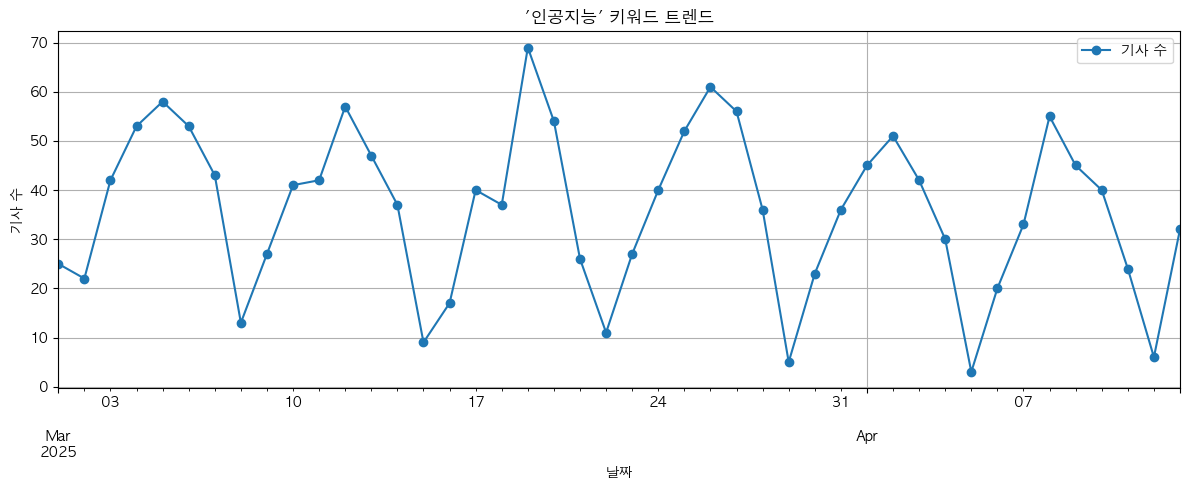

In [53]:
import requests
import os
from dotenv import load_dotenv
import pandas as pd
import matplotlib.pyplot as plt

# 1. API 키 로딩
load_dotenv()
API_KEY = os.getenv("BIGKINDS_KEY")

# 2. 요청 설정
url = "https://tools.kinds.or.kr/time_line"
query_keyword = "인공지능"
from_date = "2025-03-01"
until_date = "2025-04-14"
provider = ["서울경제"]
interval = "day"  # day, month, year

# 3. 요청 바디 구성
payload = {
    "access_key": API_KEY,
    "argument": {
        "query": query_keyword,
        "published_at": {
            "from": from_date,
            "until": until_date
        },
        "provider": provider,
        "category": [],
        "category_incident": [],
        "byline": "",
        "provider_subject": [],
        "interval": interval,
        "normalize": "false"
    }
}

# 4. API 호출
response = requests.post(url, json=payload)

# 5. 결과 처리
if response.status_code == 200:
    result = response.json()
    timeline = result["return_object"].get("time_line", [])

    print(f"\n✅ 키워드 트렌드 API 호출 성공! (키워드: '{query_keyword}')\n")
    
    if not timeline:
        print("📭 기간 내 데이터 없음.")
    else:
        print("📊 날짜별 키워드 언급량:\n")
        dates = []
        counts = []
        for point in timeline:
            label = point["label"]
            count = point["hits"]
            print(f"{label} → {count}건")
            dates.append(label)
            counts.append(count)

        # ⬇ 시각화 (옵션)
        df = pd.DataFrame({"날짜": dates, "기사 수": counts})
        df["날짜"] = pd.to_datetime(df["날짜"], format="%Y%m%d")
        df.set_index("날짜", inplace=True)

        df.plot(kind="line", figsize=(12, 5), marker="o", title=f"'{query_keyword}' 키워드 트렌드")
        plt.ylabel("기사 수")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

else:
    print("❌ 키워드 트렌드 API 오류:", response.status_code)
    try:
        print(response.json().get("reason", "알 수 없는 오류"))
    except:
        print(response.text)


# 7. 인기검색어 api

In [48]:
import requests
import os
from dotenv import load_dotenv

# 1. API 키 로딩
load_dotenv()
API_KEY = os.getenv("BIGKINDS_KEY")

# 2. 요청 설정
url = "https://tools.kinds.or.kr/query_rank"

from_date = "2025-04-01"
until_date = "2025-04-14"
offset = 10  # 가져올 인기 키워드 수

payload = {
    "access_key": API_KEY,
    "argument": {
        "from": from_date,
        "until": until_date,
        "offset": offset
        # "target_access_key": ""  ← 특정 기관 사용자 한정할 경우만 사용
    }
}

# 3. API 호출
response = requests.post(url, json=payload)

# 4. 결과 처리
if response.status_code == 200:
    result = response.json()
    keywords = result["return_object"].get("queries", [])

    print(f"✅ 인기검색어 API 호출 성공! ({from_date} ~ {until_date})\n")

    if not keywords:
        print("📭 인기 검색어가 없습니다.")
    else:
        print("📌 인기 검색어 목록:\n")
        for i, item in enumerate(keywords, 1):
            print(f"{i}. 🔍 키워드: {item['query']} | 🔢 검색 횟수: {item['count']}")
else:
    print("❌ 인기 검색어 API 오류 발생:", response.status_code)
    try:
        print("사유:", response.json().get("reason", "알 수 없는 오류"))
    except:
        print(response.text)


✅ 인기검색어 API 호출 성공! (2025-04-01 ~ 2025-04-14)

📌 인기 검색어 목록:

1. 🔍 키워드: 개최 | 🔢 검색 횟수: 367647
2. 🔍 키워드: 지원 | 🔢 검색 횟수: 286859
3. 🔍 키워드: 사업 | 🔢 검색 횟수: 239838
4. 🔍 키워드: 출시 | 🔢 검색 횟수: 223860
5. 🔍 키워드: 운영 | 🔢 검색 횟수: 203609
6. 🔍 키워드: 공연예술통계 | 🔢 검색 횟수: 162304
7. 🔍 키워드: 공연아카이브 | 🔢 검색 횟수: 162304
8. 🔍 키워드: 공연예술통합전산망 | 🔢 검색 횟수: 162304
9. 🔍 키워드: 공연빅데이터 | 🔢 검색 횟수: 162304
10. 🔍 키워드: 공연마케팅 | 🔢 검색 횟수: 162304


# 8. 뉴스 인용문 검색 api

In [6]:
import requests
import os
from dotenv import load_dotenv

# 1. API 키 로딩
load_dotenv()
API_KEY = os.getenv("BIGKINDS_KEY")

# 2. 요청 URL
url = "https://tools.kinds.or.kr/search/quotation"

# 3. 요청 조건 설정
query = "대통령"
from_date = "2025-05-30"
until_date = "2025-06-03"
provider = ["서울경제"]

# 4. 요청 바디 구성
payload = {
    "access_key": API_KEY,
    "argument": {
        "query": query,
        "published_at": {
            "from": from_date,
            "until": until_date
        },
        "provider": provider,
        "category": [],
        "category_incident": [],
        "byline": "",
        "provider_subject": [],
        "subject_info": [],
        "sort": { "date": "desc" },
        "hilight": 200,
        "return_from": 0,
        "return_size": 10,
        "fields": [
            "title"
            "quotation",
            "provider",
            "byline",
            "published_at",
            "title"
        ]
    }
}

# 5. API 호출
response = requests.post(url, json=payload)

# 6. 결과 처리
if response.status_code == 200:
    result = response.json()
    docs = result["return_object"]["documents"]
    print(f"\n✅ 뉴스 인용문 API 호출 성공! (총 {len(docs)}건)\n")

    if not docs:
        print("📭 인용문 데이터 없음")
    else:
        for i, doc in enumerate(docs, 1):
            print(f"----- {i} -----")
            print("📰 제목:", doc.get("title", "없음"))
            print("🧾 발언:", doc.get("quotation", "❌ 없음"))
            print("👤 기자:", doc.get("byline", "없음"))
            print("🗓 발행일:", doc.get("published_at", "없음"))
            print("📰 언론사:", doc.get("provider", "없음"))
            print()
else:
    print("❌ 뉴스 인용문 API 오류 발생:", response.status_code)
    try:
        print(response.json().get("reason", "알 수 없는 오류"))
    except:
        print(response.text)



✅ 뉴스 인용문 API 호출 성공! (총 10건)

----- 1 -----
📰 제목: 없음
🧾 발언: 이준석 개혁신당 대선 후보를 찍으면 이재명 더불어민주당 대선 후보만 도와주게 된다
이준석 후보와의 단일화를 성사시키지 못해 송구하다
끝까지 희망의 끈을 놓지 않고 단일화를 노력하겠다
김문수 찍으면 김문수 된다. 국민과 함께 희망 시대를 열 수 있도록 압도적 지지를 당부드린다
👤 기자: 없음
🗓 발행일: 2025-06-02T00:00:00.000+09:00
📰 언론사: 서울경제

----- 2 -----
📰 제목: 없음
🧾 발언: 댓글 조작 원조 ‘드루킹’ 세력이 듣도 보도 못한 ‘듣보잡’ 리박스쿨로 저를 엮고 있다
김대엽 병풍·생태탕·김만배·신학림 가짜 인터뷰를 떠올리게 하는 마약 중독 같은 선거 공작을 펼치고 있다
저와 국민의힘은 깊이 반성하며 국민의 뜻과 염원을 받들어 오직 국민과 나라를 위한 길에 나서겠다는 약속을 드린다
👤 기자: 없음
🗓 발행일: 2025-06-02T00:00:00.000+09:00
📰 언론사: 서울경제

----- 3 -----
📰 제목: 없음
🧾 발언: 이들이 문제를 일으킬 인물인지, 극단주의 지역 출신인지 확인해야 한다
👤 기자: 없음
🗓 발행일: 2025-06-02T00:00:00.000+09:00
📰 언론사: 서울경제

----- 4 -----
📰 제목: 없음
🧾 발언: 장 씨는 중국 정부의 자금 지원을 받는 단체와 연결돼 있으며 그의 발언은 시진핑 주석의 외교 수사를 반복한 것
👤 기자: 없음
🗓 발행일: 2025-06-02T00:00:00.000+09:00
📰 언론사: 서울경제

----- 5 -----
📰 제목: 없음
🧾 발언: 김문수 국민의힘 대선 후보는 리박스쿨, 이런 사이버 내란에 해당하는 중대범죄행위를 한 것에 대해 어떤 입장인지 해명하는 게 먼저일 것
국가 예산을 전용해서, 국가 권력 일부를 이용해서 '이재명 나빠 김문수 좋아' 이런 댓글을 조직적으로 썼다
국민 여론을 조작해 민주주의 자체를 파괴하려 한 사이

# 9. 오늘의 키워드 api(분야별 키워드))

In [58]:
import requests
import os
from dotenv import load_dotenv

# 1. API 키 로딩
load_dotenv()
API_KEY = os.getenv("BIGKINDS_KEY")
url = "https://tools.kinds.or.kr/today_category_keyword"

# 2. 요청 바디 구성
payload = {
    "access_key": API_KEY,
    "argument": {}
}

# 3. API 호출
response = requests.post(url, json=payload)

# 4. 결과 처리
if response.status_code == 200:
    result = response.json()
    print("✅ 오늘의 키워드 API 호출 성공!\n")

    print("📊 분야별 기사 비중 (cate_ratio):\n")
    for item in result["return_object"].get("cate_ratio", []):
        print(f"🗂 분야: {item['category_name']}")
        print(f"   📈 비중: {item['category_percent']}%")
        print(f"   📰 기사 수: {item['category_count']}건\n")

    print("🔑 분야별 주요 키워드 (cate_keyword):\n")
    for item in result["return_object"].get("cate_keyword", []):
        print(f"📌 분야: {item['category_name']}")
        print(f"   🔍 키워드: {item['named_entity']}")
        print(f"   📊 등장 횟수: {item['named_entity_count']}")
        print(f"   🧠 타입: {item['named_entity_type']} | 단계: {item['entity_step']}")
        print("-" * 50)

else:
    print("❌ 오늘의 키워드 API 오류:", response.status_code)
    try:
        print("사유:", response.json().get("reason", "알 수 없는 오류"))
    except:
        print(response.text)


✅ 오늘의 키워드 API 호출 성공!

📊 분야별 기사 비중 (cate_ratio):

🗂 분야: 전체
   📈 비중: 100%
   📰 기사 수: 670건

🗂 분야: 정치
   📈 비중: 10.4%
   📰 기사 수: 70건

🗂 분야: 경제
   📈 비중: 14.2%
   📰 기사 수: 95건

🗂 분야: 사회
   📈 비중: 14.5%
   📰 기사 수: 97건

🗂 분야: 문화
   📈 비중: 12.7%
   📰 기사 수: 85건

🗂 분야: 국제
   📈 비중: 11.6%
   📰 기사 수: 78건

🗂 분야: 지역
   📈 비중: 11.2%
   📰 기사 수: 75건

🗂 분야: 스포츠
   📈 비중: 10.1%
   📰 기사 수: 68건

🗂 분야: IT_과학
   📈 비중: 15.2%
   📰 기사 수: 102건

🔑 분야별 주요 키워드 (cate_keyword):

📌 분야: 전체
   🔍 키워드: 민주당
   📊 등장 횟수: 536
   🧠 타입: OG | 단계: step4
--------------------------------------------------
📌 분야: 전체
   🔍 키워드: 미국
   📊 등장 횟수: 457
   🧠 타입: LC | 단계: step4
--------------------------------------------------
📌 분야: 전체
   🔍 키워드: 경기
   📊 등장 횟수: 455
   🧠 타입: LC | 단계: step4
--------------------------------------------------
📌 분야: 전체
   🔍 키워드: 자원
   📊 등장 횟수: 327
   🧠 타입: OG | 단계: step4
--------------------------------------------------
📌 분야: 전체
   🔍 키워드: 충남
   📊 등장 횟수: 261
   🧠 타입: LC | 단계: step4
-----------------------------------------

# 10. 특성 추출 api

In [67]:
import requests
import os
from dotenv import load_dotenv

# 1. 환경 변수 로딩
load_dotenv()
API_KEY = os.getenv("BIGKINDS_KEY")

# 2. 요청 URL
url = "https://tools.kinds.or.kr/feature"

# 3. 분석할 기사 텍스트 입력
payload = {
    "access_key": API_KEY,
    "argument": {
        "title": "AI 채용 시대… 서울시, 비대면 면접 체험 확대",
        "sub_title": "AI 면접 역량 검사 프로그램, 청년 구직자 대상 운영",
        "content": """
        서울시는 청년들이 급변하는 취업 트렌드에 발맞춰 비대면 AI 채용에 대비할 수 있도록
        AI 면접 체험과 역량 검사 프로그램을 제공한다.
        이 프로그램은 지난해 1만 5506명의 청년 구직자가 이용했으며 95.8%의 만족도를 보였다.
        """
    }
}

# 4. API 호출
response = requests.post(url, json=payload)

# 5. 결과 처리
if response.status_code == 200:
    result = response.json()
    print("✅ 특성 추출 API 호출 성공!\n")

    for field in ["title", "sub_title", "content"]:
        print(f"📌 {field.upper()} 키워드:")
        text = result["return_object"]["result"].get(field, "")
        
        if not text.strip():
            print(" - (데이터 없음)")
            continue
        
        for item in text.strip().split(" "):  # 공백으로 나눔
            if "|" in item:
                keyword, score = item.split("|")
                print(f" - 🔑 {keyword} (점수: {score})")
            else:
                print(f" - 🔑 {item} (점수 없음)")
        print()

else:
    print("❌ 특성 추출 API 오류:", response.status_code)
    try:
        print(response.json().get("reason", "알 수 없는 오류"))
    except:
        print(response.text)


✅ 특성 추출 API 호출 성공!

📌 TITLE 키워드:
 - 🔑 비대면 (점수: 0.13796401859895588)
 - 🔑 비대면_면접_체험_확대 (점수: 0.1122394846785009)
 - 🔑 비대면_면접 (점수: 0.1107085743755595)
 - 🔑 서울시 (점수: 0.10651785867763924)
 - 🔑 체험_확대 (점수: 0.09864334565614173)
 - 🔑 AI_채용_시대 (점수: 0.09800636937840729)
 - 🔑 AI_채용 (점수: 0.09271911827034766)
 - 🔑 AI (점수: 0.07846417387877458)
 - 🔑 채용 (점수: 0.0014145957856628558)
 - 🔑 시대 (점수: 0.0011054769720295822)
 - 🔑 체험 (점수: 0.0010777483865251438)
 - 🔑 확대 (점수: 0.001070060506441623)
 - 🔑 면접 (점수: 0.001069983064895179)

📌 SUB_TITLE 키워드:
 - 🔑 청년_구직자_대상_운영 (점수: 0.10068949813023778)
 - 🔑 역량_검사 (점수: 0.10011496461196061)
 - 🔑 청년_구직자 (점수: 0.09917197466307658)
 - 🔑 구직자 (점수: 0.09605917594158779)
 - 🔑 대상_운영 (점수: 0.08860724356059647)
 - 🔑 AI_면접 (점수: 0.07590898815867458)
 - 🔑 AI (점수: 0.07039955835632354)
 - 🔑 검사 (점수: 0.0012411734209193646)
 - 🔑 청년 (점수: 0.001232385078828527)
 - 🔑 면접 (점수: 0.0010003022000747816)
 - 🔑 프로그램 (점수: 9.872904376385088E-4)
 - 🔑 역량 (점수: 9.71513240470275E-4)
 - 🔑 대상 (점수: 9.686366219366614E-4

# 11. 키워드 추출 api

In [70]:
import requests
import os
from dotenv import load_dotenv

# 1. 환경 변수 로딩
load_dotenv()
API_KEY = os.getenv("BIGKINDS_KEY")

# 2. API URL
url = "https://tools.kinds.or.kr/keyword"

# 3. 본문 입력
payload = {
    "access_key": API_KEY,
    "argument": {
        "title": "AI 채용 시대… 서울시, 비대면 면접 체험 확대",
        "sub_title": "AI 면접 역량 검사 프로그램, 청년 구직자 대상 운영",
        "content": """
        서울시는 청년들이 급변하는 취업 트렌드에 발맞춰 비대면 AI 채용에 대비할 수 있도록
        AI 면접 체험과 역량 검사 프로그램을 제공한다.
        """
    }
}

# 4. API 호출
response = requests.post(url, json=payload)

# 5. 결과 출력
if response.status_code == 200:
    result = response.json()
    print("✅ 키워드 추출 API 호출 성공!\n")

    for field in ["title", "sub_title", "content"]:
        keywords = result["return_object"]["result"].get(field, "")
        print(f"📌 {field.upper()} 키워드:")
        for word in keywords.strip().split(" "):
            if word:
                print(f" - 🔑 {word}")
        print()
else:
    print("❌ 키워드 추출 API 오류:", response.status_code)
    try:
        print(response.json().get("reason", "알 수 없는 오류"))
    except:
        print(response.text)


✅ 키워드 추출 API 호출 성공!

📌 TITLE 키워드:
 - 🔑 ai
 - 🔑 채용
 - 🔑 시대
 - 🔑 서울시
 - 🔑 비대면
 - 🔑 면접
 - 🔑 체험
 - 🔑 확대

📌 SUB_TITLE 키워드:
 - 🔑 ai
 - 🔑 면접
 - 🔑 역량
 - 🔑 검사
 - 🔑 프로그램
 - 🔑 청년
 - 🔑 구직자
 - 🔑 대상
 - 🔑 운영

📌 CONTENT 키워드:
 - 🔑 서울시
 - 🔑 청년들
 - 🔑 급변
 - 🔑 취업
 - 🔑 트렌드
 - 🔑 비대면
 - 🔑 ai
 - 🔑 채용
 - 🔑 대비
 - 🔑 ai
 - 🔑 면접
 - 🔑 체험
 - 🔑 역량
 - 🔑 검사
 - 🔑 프로그램
 - 🔑 제공



# 12. topn 키워드 api

In [ ]:
import requests
import os
from dotenv import load_dotenv

# API 키 로딩
load_dotenv()
API_KEY = os.getenv("BIGKINDS_KEY")

url = "https://tools.kinds.or.kr/topn_keyword"

payload = {
    "access_key": API_KEY,
    "argument": {
        "published_at": {
            "from": "2025-04-01",
            "until": "2025-04-14"
        },
        "query": "인공지능 OR AI"
    }
}

response = requests.post(url, json=payload)

if response.status_code == 200:
    result = response.json()
    
    if result.get("result") == 0:
        keywords = result["return_object"]["result"]
        print("✅ TopN 키워드 API 호출 성공!\n")
        if not keywords:
            print("📭 추출된 키워드가 없습니다.")
        else:
            for item in keywords:
                print(f"{item['rank']}. 🔑 {item['name']}")
    else:
        print("⚠️ API 내부 실패")
        print("사유:", result.get("reason", "알 수 없는 오류"))
else:
    print("❌ API 통신 오류:", response.status_code)
    try:
        print(response.json().get("reason", "알 수 없는 오류"))
    except:
        print(response.text)


✅ TopN 키워드 API 호출 성공!

1. 🔑 반도체
2. 🔑 미국
3. 🔑 LG
4. 🔑 광주
5. 🔑 경쟁력
6. 🔑 한국
7. 🔑 클라우드
8. 🔑 중국
9. 🔑 생성형 AI
10. 🔑 삼성전자
11. 🔑 SK
12. 🔑 AX
13. 🔑 스타트업
14. 🔑 구글
15. 🔑 전문가
16. 🔑 실시간
17. 🔑 광주시
18. 🔑 고도화
19. 🔑 일본
20. 🔑 AI 모델
21. 🔑 서울
22. 🔑 KT
23. 🔑 엔비디아
24. 🔑 이용자
25. 🔑 LLM
26. 🔑 SKT
27. 🔑 GPU
28. 🔑 사용자
29. 🔑 연구원
30. 🔑 KAIST
31. 🔑 제조업
32. 🔑 UNIST
33. 🔑 기업들
34. 🔑 차세대
35. 🔑 네이버
36. 🔑 TV
37. 🔑 대한민국
38. 🔑 모빌리티
39. 🔑 포항
40. 🔑 보고서
41. 🔑 챗GPT
42. 🔑 대변인
43. 🔑 AI 서비스
44. 🔑 업무협약
45. 🔑 거버넌스
46. 🔑 SK텔레콤
47. 🔑 가속화
48. 🔑 AI 시대
49. 🔑 LG전자
50. 🔑 최적화
51. 🔑 AI 활용
52. 🔑 디지털 전환
53. 🔑 이슬림코리아
54. 🔑 챗봇
55. 🔑 퓨리오사에이아이
56. 🔑 휴머노이드
57. 🔑 공무원
58. 🔑 지브리
59. 🔑 빅테크
60. 🔑 카카오모빌리티
61. 🔑 연구소
62. 🔑 자동화
63. 🔑 MOU
64. 🔑 R&D
65. 🔑 소비자
66. 🔑 국가 AI
67. 🔑 일자리
68. 🔑 AI 대변인
69. 🔑 오픈AI
70. 🔑 포항시
71. 🔑 에이닷
72. 🔑 뤼튼
73. 🔑 SW
74. 🔑 과학기술정보통신부
75. 🔑 CEO
76. 🔑 정통부
77. 🔑 퓨리오사
78. 🔑 위원회
79. 🔑 네트워크
80. 🔑 생태계
81. 🔑 충남
82. 🔑 활성화
83. 🔑 딥시크
84. 🔑 보이스피싱
85. 🔑 본부장
86. 🔑 유플러스
87. 🔑 팹리스
88. 🔑 드론
89. 🔑 AI 산업
90. 🔑 생성형 인공지능
91. 🔑 딥테크
92. 🔑 자율주행
93. 🔑 GPT
94. 